In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In [2]:
logger = phoebe.logger()

In [3]:
b = phoebe.default_binary(contact_binary = True)

In [4]:
#b.add_constraint('semidetached', 'primary')

In [5]:
#b.add_constraint('semidetached', 'secondary')

In [6]:
b.add_feature('spot', component='primary', feature='spot01', relteff=0.9, radius=13, colat=90, long=-45)

Tue, 27 Oct 2020 18:14 PARAMETERS   WARNING wrapping value of long to 315.0 deg


<ParameterSet: 5 parameters | contexts: feature, compute>

In [7]:
b['period@orbit'] = 1
b['sma@orbit'] = 1

b['q@binary'] = 0.44
b['incl@binary'] = 78
b['requiv@primary'] = 0.46
#b['requiv@secondary'] = 1.4
b['teff@primary'] = 5660
b['teff@secondary'] = 5656

Tue, 27 Oct 2020 18:14 BUNDLE       ERROR   Constraint 'pot@contact_envelope@envelope@constraint' raised the following error while attempting to solve for 'pot@contact_envelope@envelope@component'.  Consider flipping the constraint or changing the value of one of ['requiv@primary@star@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'pot@contact_envelope@envelope@component'] until the constraint succeeds.  Original error: roche_contact_Omega_at_partial_vol::Volume is outside bounds.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING secondary is underflowing at L1 and not a contact system (requiv=0.4477611940298506, requiv_min=1.2725418568681297, requiv_max=1.6724563972838378)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  I

Tue, 27 Oct 2020 18:14 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.37986324085615814, requiv_max=0.49924071560711597)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING secondary is underflowing at L1 and not a contact system (requiv=0.4477611940298506, requiv_min=1.2725418568681297, requiv_max=1.6724563972838378)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.37986324085615814, requiv_max=0.49924071560711597)  If not

Tue, 27 Oct 2020 18:14 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.37986324085615814, requiv_max=0.49924071560711597)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.37986324085615814, requiv_max=0.49924071560711597)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.

Tue, 27 Oct 2020 18:14 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.4535195511588265, requiv_max=0.5286203859723391)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING secondary is overflowing at L2/L3 (requiv=0.4477611940298506, requiv_min=0.3102496808894846, requiv_max=0.39464229494181874)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 27 Oct 2020 18:14 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see t

In [8]:
times = np.linspace(0, 1, 150)
b.add_dataset('lc', times=times, passband='Johnson:B')

<ParameterSet: 78 parameters | contexts: dataset, figure, constraint, compute>

In [9]:
b.add_dataset('mesh', times=[0.25], columns='teffs') 

Tue, 27 Oct 2020 18:14 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 85 parameters | contexts: dataset, figure, constraint, compute>

In [10]:
b.run_compute()

100%|██████████| 151/151 [00:10<00:00, 14.04it/s]


<ParameterSet: 15 parameters | kinds: mesh, lc>

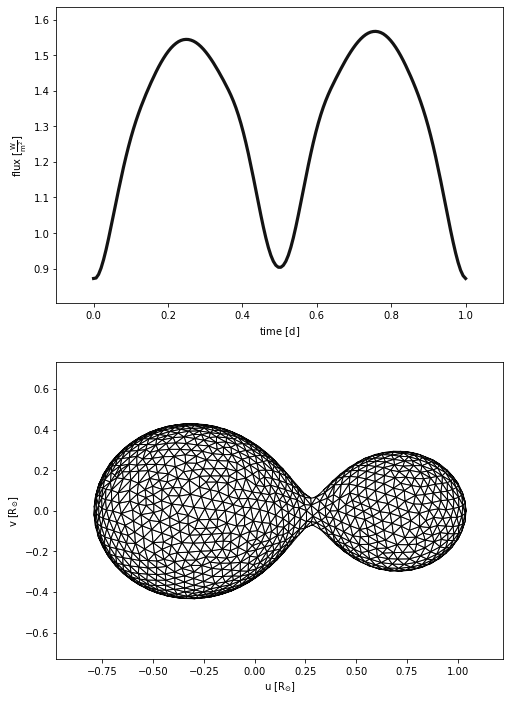

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [11]:
b.plot(show=True)

Tue, 27 Oct 2020 18:14 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring fc=teffs
Tue, 27 Oct 2020 18:14 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring ec=face
Tue, 27 Oct 2020 18:14 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring fc=teffs
Tue, 27 Oct 2020 18:14 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring ec=face
Tue, 27 Oct 2020 18:14 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.250000, assuming named color
Tue, 27 Oct 2020 18:14 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.250000, assuming named color


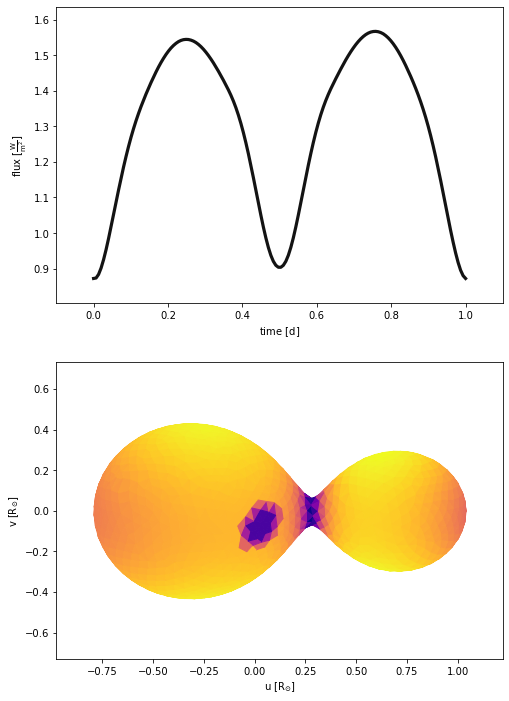

In [12]:
afig, mplfig = b.plot(fc = 'teffs', ec = 'face', fcmap= 'plasma', show = True)

In [13]:
phases = b.to_phase(times)
phases_sorted = sorted(phases)
flux = b['fluxes@model'].interp_value(phases=phases_sorted)

In [14]:
ls

data.lc       funcfit.ipynb    mcmclc.ipynb      v737per.B
dxcode.ipynb  licurdata.ipynb  PHRASEMCMC.ipynb


In [15]:
v737 = np.loadtxt('v737per.B')

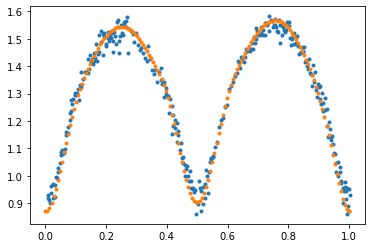

In [20]:
vdata = v737[:,1]
flux = vdata/(-2.5)
flux10 = 10**flux
plt.plot(v737[:,0]+0.004, flux10+0.07, '.')
#plt.plot(v737[:,0], -vdata+1.08, '.') #b['value@times@lc01@model']
#plt.plot(phases_sorted,flux,'.')
#ax = plt.gca()
#ax.yaxis.set_ticks_position('left') #将y轴的位置设置在右边
#ax.invert_yaxis() #y轴反向

plt.plot(b['value@times@lc01@model'], b['value@fluxes@lc01@model'], '.') 

In [17]:
print(b.filter(context='component'))

ParameterSet: 56 parameters
         requiv@primary@component: 0.46 solRad
C    requiv_max@primary@component: 0.5286203859723391 solRad
C    requiv_min@primary@component: 0.4535195511588265 solRad
           teff@primary@component: 5660.0 K
C          logg@primary@component: 3.081876108973402
        syncpar@primary@component: 1.0
C        period@primary@component: 1.0 d
C          freq@primary@component: 6.283185 rad / d
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
C          mass@primary@component: 0.00931803076631707 solMass
C      requiv@secondary@component: 0.3172543643421175 solRad
C  requiv_max@secondary@component: 0.39464229494181874 solRad
C  requiv_min@secondary@component: 0.3102496808894846 solRad
         teff@secondary@component: 5656.0 K
C        logg@secondary@component: 3